In [13]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import linprog

In [14]:
c = np.array([-5.0, -4.0]) # Coeficientes de la funcion costo
A = np.array([[6,4],[1,2],[-1,1],[0,1]]) # coeficientes de la matriz de restricciones
b = np.array([24, 6, 1, 2]) # coeficientes libres

In [15]:
resultado = linprog(c, A, b, method="revised simplex")
print(resultado)  # se muestra la estructura

 message: Optimization terminated successfully.
 success: True
  status: 0
     fun: -21.0
       x: [ 3.000e+00  1.500e+00]
     nit: 2


C:\Users\Victo\AppData\Local\Temp\ipykernel_16360\1794753536.py:1: DeprecationWarning: `method='revised simplex'` is deprecated and will be removed in SciPy 1.11.0. Please use one of the HiGHS solvers (e.g. `method='highs'`) in new code.
  resultado = linprog(c, A, b, method="revised simplex")


In [16]:
def grafico(c,A,b,limites,zz):
    N = A.shape[0]
    print("Numero de Desigualdades (Restricciones): ", N)
    plt.figure()
    plt.title("Función Objetivo:  z = "+ " + ".join([str(x)+" x"+str(i+1) for i,x in enumerate(c)]))
    X = np.linspace(0,15)
    for i in range(0,N):
        c_txt = " + ".join([str(x)+" x"+str(i+1) for i,x in enumerate(A[i,:])]) + " <= " + str(b[i])
        plt.plot(X, -X*(A[i,0]/A[i,1]) + b[i]/A[i,1] ,label = c_txt ) 

    for j in range(zz[0],zz[1], zz[2]):
        c_txt = "z = " + str(j)
        plt.plot(X, -X*(c[0]/c[1]) + (j/c[1]), "--" ,label = c_txt ) 
    res = linprog(c, A, b, method="revised simplex")
    plt.plot(res.x[0],res.x[1],"ro", label="Solucion")
    plt.xlim(0,limites[0])
    plt.ylim(0,limites[1])
    plt.legend()
    plt.grid()
    plt.show()

In [17]:
np.dot(resultado.x.T , -c)

21.0

C:\Users\Victo\AppData\Local\Temp\ipykernel_16360\2862852545.py:14: DeprecationWarning: `method='revised simplex'` is deprecated and will be removed in SciPy 1.11.0. Please use one of the HiGHS solvers (e.g. `method='highs'`) in new code.
  res = linprog(c, A, b, method="revised simplex")


Numero de Desigualdades (Restricciones):  4


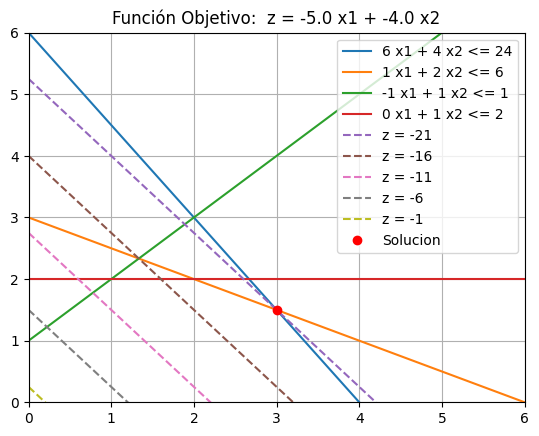

In [18]:
grafico(c,A,b,[6,6],[-21,0,5])